In this assignment we have to make ARIMA model over shampoo sales  data and check the MSE between predicted and actual value.

Steps to follow:
1. Visualize the Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions
6. Model Evaluation

In [1]:
import pandas as pd
from pandas import datetime 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error 

<ipython-input-1-f675926a6e99>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x): 
    return datetime.strptime('190'+x, '%Y-%m') 

In [3]:
url = "https://raw.githubusercontent.com/andersy005/deep-learning/master/keras/Recurrent_Neural_Nets/datasets/sales-of-shampoo-over-a-three-ye.csv"
data = pd.read_csv(url, header=0, parse_dates=[0],  index_col=0, date_parser=parser)
data.columns = ["Sales"]

In [4]:
data.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [5]:
data.isnull().sum()

Sales    0
dtype: int64

### 1. Visualize the Data

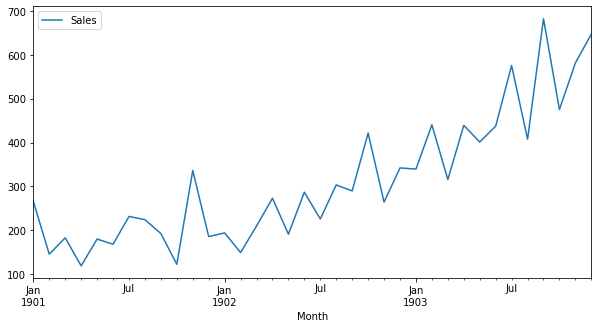

In [6]:
data.plot(figsize=(10,5))

### 2. Make the time series data stationary

In [7]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [8]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ["ADF Test Statistic", "p-value", "Lags Used", "Number of Observations Used"]
    for value, label in zip(result, labels):
        print(label,":",str(value))
    if result[1]<=0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is not Stationary")

In [9]:
adfuller_test(data)

ADF Test Statistic : 3.0601420836411806
p-value : 1.0
Lags Used : 10
Number of Observations Used : 25
Accept Null Hypothesis. Data is not Stationary


Differencing to make the data stationary

In [10]:
data["First Difference"] = data - data.shift(1)

In [11]:
data["Seasonal First Difference"] = data.iloc[:,0] - data.iloc[:,0].shift(12)

In [12]:
data.tail()

,Sales,First Difference,Seasonal First Difference
Month,,,
1903-08-01,407.6,-167.9,104.0
1903-09-01,682.0,274.4,392.1
1903-10-01,475.3,-206.7,53.7
1903-11-01,581.3,106.0,316.8
1903-12-01,646.9,65.6,304.6


In [13]:
# dickey fuller test
adfuller_test(data["First Difference"].dropna())

ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
Lags Used : 1
Number of Observations Used : 33
Reject Null Hypothesis. Data is Stationary


In [14]:
# dickey fuller test
adfuller_test(data["Seasonal First Difference"].dropna())

ADF Test Statistic : -0.04561553414249077
p-value : 0.9545931714075298
Lags Used : 6
Number of Observations Used : 17
Accept Null Hypothesis. Data is not Stationary


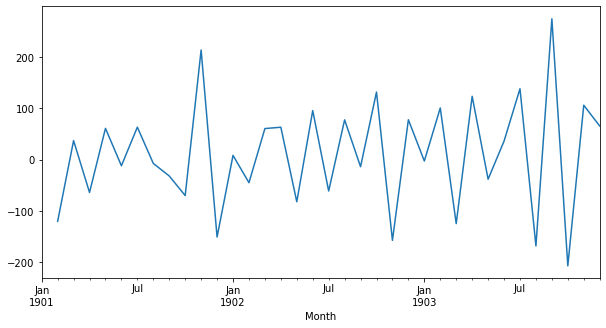

In [15]:
data["First Difference"].plot(figsize=[10,5])

### 3. Plot the Correlation and AutoCorrelation Charts

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


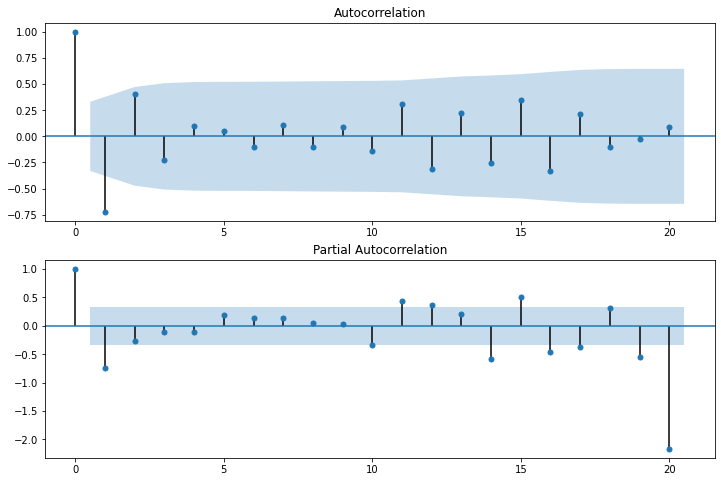

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(211)
fig = plot_acf(data['First Difference'].iloc[1:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['First Difference'].iloc[1:], lags=20, ax=ax2)

### 4 & 5. Construct the ARIMA Model or Seasonal ARIMA based on the data and use the model to make predictions

In [17]:
# p=1, d=1, q=1
model = ARIMA(data['Sales'], order=(1,1,1))
model_fit = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 18 Feb 2021   AIC                            402.467
Time:                        19:27:19   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     -3.303      0.001      -0.818      -0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7625           +0.0000j            1.7625            0.5000
MA.1            1.9483           +0.0000j            1.9483            0.0000
-----------------------------------------------------------------------------
"""

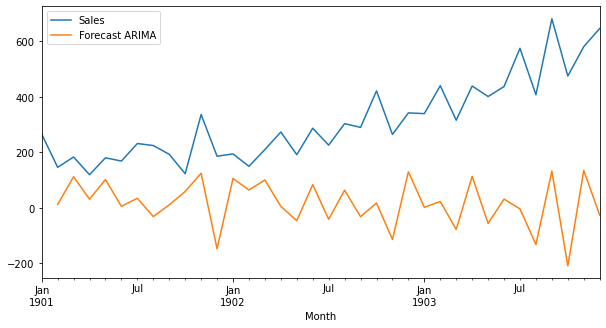

In [19]:
data["Forecast ARIMA"] = model_fit.predict(start=1, end=35)
data[["Sales", "Forecast ARIMA"]].plot(figsize=[10,5])

In [20]:
model = SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


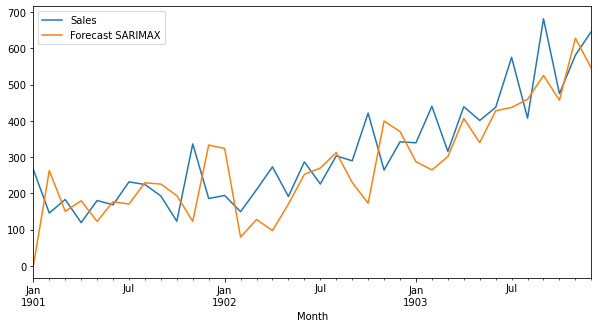

In [21]:
data["Forecast SARIMAX"] = results.predict(start=0, end=35)
data[["Sales", "Forecast SARIMAX"]].plot(figsize=[10,5])

### 6. Model Evaluation

In [22]:
def mean_forecast_error(y, yhat):
    return y.sub(yhat).mean()

In [23]:
print("The MSE for ARIMA Model is",mean_squared_error(data['Sales'][1:], data['Forecast ARIMA'][1:]))
print("The MFE for ARIMA Model is",mean_forecast_error(data['Sales'][1:], data['Forecast ARIMA'][1:]))

The MSE for ARIMA Model is 117735.67160091427
The MFE for ARIMA Model is 297.5434449607829


In [24]:
print("The MSE for SARIMAX Model is",mean_squared_error(data['Sales'][1:], data['Forecast SARIMAX'][1:]))
print("The MFE for SARIMAX Model is",mean_forecast_error(data['Sales'][1:], data['Forecast SARIMAX'][1:]))

The MSE for SARIMAX Model is 9838.262464563597
The MFE for SARIMAX Model is 26.54085958134829
